Reading of the manual anotated files from Johannes.

In [1]:
import struct
import numpy as np


def readAnotations(path, fileName):
    global f, numByte, fileNameRead, byte, width, decoded, height, all, slices
    f = open(path + fileName, "rb")
    try:
        numByte = 0
        fileNameRead = ""
        byte = f.read(1)
        while byte != "":
            byte = f.read(1)
            if numByte < len(fileName):
                fileNameRead += byte
            else:
                fileNameRead += byte
                width = decoded = struct.unpack('>I', f.read(4))[0]  # This is magic, we have big-endian coding
                height = decoded = struct.unpack('>I', f.read(4))[0]
                #print("Read header of [" + fileNameRead + "] width = , " + str(width) + " height=" + str(height))
                all = np.fromfile(f, dtype='>I', count=-1, sep='')
                slices = len(all) / (width * height)
                Y = np.reshape(all, (slices, width, height))
                #print("Read the rest. We have " + str(slices))
                f.close()
                return Y
            numByte += 1
    finally:
        f.close()

3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_20.dcm.iov (1, 256, 256) 0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_4.dcm.iov (1, 256, 256) 0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_10.dcm.iov (1, 256, 256) 2
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_14.dcm.iov (1, 256, 256) 2
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_11.dcm.iov (1, 256, 256) 2
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_13.dcm.iov (1, 256, 256) 2
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_9.dcm.iov (1, 256, 256) 0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_19.dcm.iov (1, 256, 256) 0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_6.dcm.iov (1, 256, 256) 0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_12.dcm.iov (1, 256, 256) 2
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_5.dcm.iov (1, 256, 256) 0
3SUIUNLJQMTGZR

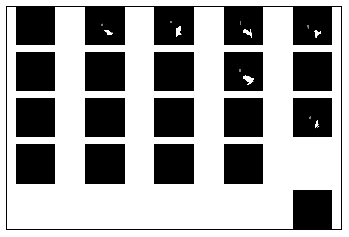

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import os
%matplotlib inline

#path = "/Users/oli/Proj_Large_Data/Deep_Learning_MRI/insel_annotated/ADC-contouring-test-case/3-ep2d_diff_3scan_p3_m128_ADC/iov/"
path = '/home/dueo/data/Inselspital_2015_07_08/metastasis/001_3SUIUNLJQMTGZRVTJM7LWTPHDA======/3SUIUNLJQMTGZRVTJM7LWTPHDA======-20150130-0/3-ep2d_diff_3scan_p3_m128_ADC/iov/'
fig = plt.figure()
plt.xticks([])
plt.yticks([])
files = os.listdir(path)
for i,file in enumerate(files):
    Y = readAnotations(path, file)
    a = fig.add_subplot(5, 5, i, xticks=[], yticks=[])  
    plt.imshow(Y[0,:,:], cmap=plt.get_cmap('gray'))
    print(file + ' ' + str(Y.shape) + " " + str(Y.max()))
